# Uploading Libraries

In [11]:
import numpy as np
import pandas as pd
from scipy.signal import filtfilt,lfilter , butter
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import wave
import struct
from io import BytesIO
import tempfile
import requests
from scipy.io import wavfile
import sys
from IPython.display import display,Audio,HTML
import pydub

# Loading data from csv files

In [12]:
real=pd.read_csv("Group_3.csv")
img=pd.read_csv("Group_3img.csv")

# Naming columns 

In [13]:
real.columns=['freqreal']
img.columns=['freqimg']

# Appending data to array

In [14]:
i=[]
for p in img['freqimg']:
    i.append(p)
    
r=[]
for p in real['freqreal']:
    r.append(p)

In [15]:
c=[]
for p,q in zip(r,i):
    c.append(complex(p,q))

In [16]:
signal=np.array(c)
abssignal=abs(signal)
frange=np.linspace(-np.pi,np.pi,len(signal))

# Mapping the signal in range(-pi,pi)

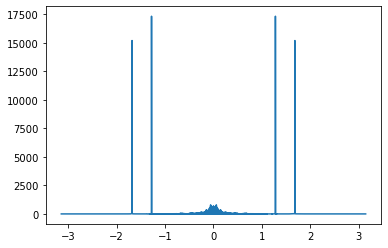

In [17]:
plt.plot(np.linspace(-np.pi,np.pi,len(signal)),np.fft.fftshift(abssignal))
#plt.ylabel('Magnitude')

plt.savefig(r"C:\Users\syed\3D Objects\python\Origional\magnitude.png")

# Phase Response of signal

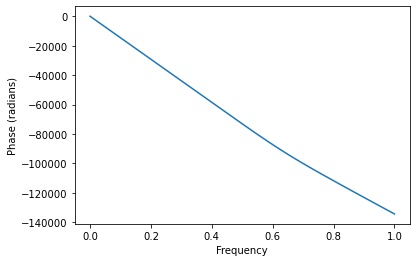

In [24]:
plt.phase_spectrum(abssignal)
plt.savefig(r"C:\Users\syed\3D Objects\python\Origional\phase.png")

# Filtering Function

In [25]:
def filtering(signal,cutoff,filt,order=5):
    
    
    
    order=5
    b, a = butter(order,cutoff,filt,analog=False)  #butterworth function for returning a and b values
    y=scipy.signal.filtfilt(b,a,signal,axis=0)
    
    return y

# Saving the noisy signal

In [26]:
ft=np.fft.ifft(signal)
scipy.io.wavfile.write(r"C:\Users\syed\3D Objects\python\Origional\noisy.wav",44100,abs(ft))

# Low Pass Signal

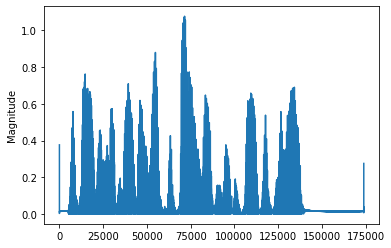

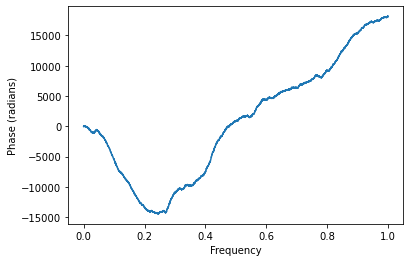

In [32]:
fs=44100
n=len(signal)
fnyq=fs/2
cutoff=fs/n

lowpass=filtering(ft,cutoff,'lowpass')


#Magnitude Response of lowpass signal
plt.figure(1)
plt.plot(abs(lowpass))
plt.ylabel('Magnitude')
plt.savefig(r"C:\Users\syed\3D Objects\python\lowpass\magnitude.png")

#Phase response of lowpass signal
plt.figure(2)
plt.phase_spectrum(abs(lowpass))
plt.savefig(r"C:\Users\syed\3D Objects\python\lowpass\phase.png")

#saving Wave
scipy.io.wavfile.write(r"C:\Users\syed\3D Objects\python\lowpass\lowpass.wav",44100,abs(lowpass))


# High Pass Filtering

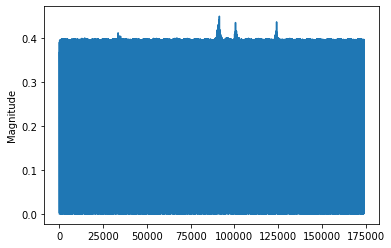

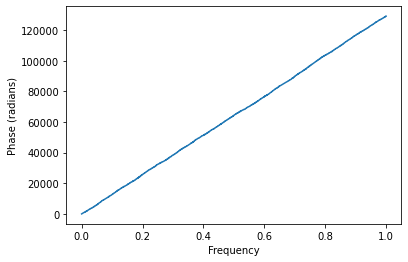

In [33]:
fs=44100
n=len(signal)
fnyq=fs/2
cutoff=fs/n

highpass=filtering(ft,cutoff,'highpass')


#Magnitude Response of lowpass signal
plt.figure(1)
plt.plot(abs(highpass))
plt.ylabel('Magnitude')
plt.savefig(r"C:\Users\syed\3D Objects\python\highpass\magnitude.png")

#Phase response of lowpass signal
plt.figure(2)
plt.phase_spectrum(abs(highpass))
plt.savefig(r"C:\Users\syed\3D Objects\python\highpass\phase.png")

#saving Wave
scipy.io.wavfile.write(r"C:\Users\syed\3D Objects\python\highpass\highpass.wav",44100,abs(highpass))


# Band Stop Filtering

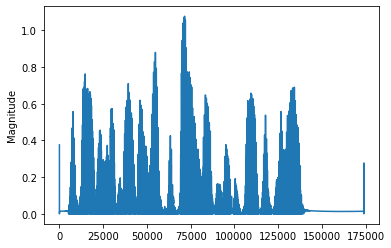

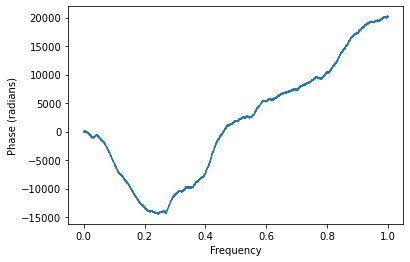

In [34]:
fs=44100
n=len(signal)
fnyq=fs/2
cutofflow=fs/n
cutoffhigh=fs/n+0.44


bandstop=filtering(ft,[cutofflow,cutoffhigh],'bandstop')


#Magnitude Response of lowpass signal
plt.figure(1)
plt.plot(abs(bandstop))
plt.ylabel('Magnitude')
plt.savefig(r"C:\Users\syed\3D Objects\python\bandstop\magnitude.png")

#Phase response of lowpass signal
plt.figure(2)
plt.phase_spectrum(abs(bandstop))
plt.savefig(r"C:\Users\syed\3D Objects\python\bandstop\phase.png")

#saving Wave
scipy.io.wavfile.write(r"C:\Users\syed\3D Objects\python\bandstop\bandstop.wav",44100,abs(bandstop))


# # Band pass filter

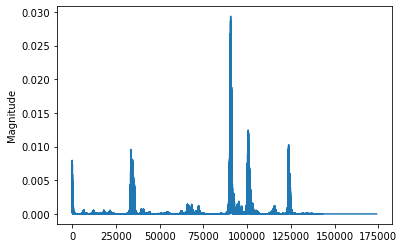

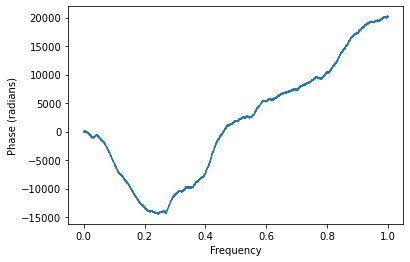

In [35]:
fs=44100
n=len(signal)
fnyq=fs/2
cutofflow=fs/n
cutoffhigh=fs/n+0.0045


bandpass=filtering(ft,[cutofflow,cutoffhigh],'bandpass')


#Magnitude Response of lowpass signal
plt.figure(1)
plt.plot(abs(bandpass))
plt.ylabel('Magnitude')
plt.savefig(r"C:\Users\syed\3D Objects\python\bandpass\magnitude.png")

#Phase response of lowpass signal
plt.figure(2)
plt.phase_spectrum(abs(bandstop))
plt.savefig(r"C:\Users\syed\3D Objects\python\bandpass\phase.png")

#saving Wave
scipy.io.wavfile.write(r"C:\Users\syed\3D Objects\python\bandpass\bandpass.wav",44100,abs(bandpass))
